In [1]:
# Step 1: Import the necessary libraries (if not done already)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the dataset
data = pd.read_csv("energy_cleaned.csv")

# Step 3: Filter the data for a single country (e.g., Germany)
country_data = data[data['Country'] == 'Germany']

In [2]:
# Prepare the features (X) and target (y)
features = ['Energy_consumption']
target_columns = ['CO2_emission', 'Energy_production', 'GDP', 'Population']

# Split data into renewable and non-renewable
renewables_data = country_data[country_data['Energy_type'] == 'renewables']
non_renewables_data = country_data[country_data['Energy_type'] == 'non-renewables']

# Initialize a dictionary to store results for both types
results = {}

In [4]:
# Step 4: Function to train model, calculate metrics, and store results
def train_and_evaluate(X, y, energy_type):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_model.predict(X_test)
    
    # Get feature importance (since we only have one feature 'Energy_consumption')
    feature_importances = rf_model.feature_importances_
    
    # Calculate MSE, R², and variance for each target
    energy_results = {}
    for i, target in enumerate(target_columns):
        mse = mean_squared_error(y_test[target], y_pred[:, i])
        r2 = r2_score(y_test[target], y_pred[:, i])
        variance = np.var(y_test[target])
        energy_results[target] = {
            'MSE': mse,
            'R²': r2,
            'Variance': variance,
            'y_test': y_test[target],
            'y_pred': y_pred[:, i]
        }
    
    # Store results for this energy type
    results[energy_type] = {
        'feature_importances': feature_importances,
        'metrics': energy_results
    }


In [5]:
# Step 5: Train and evaluate for renewables and non-renewables
X_renewables = renewables_data[features]
y_renewables = renewables_data[target_columns]
train_and_evaluate(X_renewables, y_renewables, 'renewables')

X_non_renewables = non_renewables_data[features]
y_non_renewables = non_renewables_data[target_columns]
train_and_evaluate(X_non_renewables, y_non_renewables, 'non-renewables')


In [6]:
# Step 6: Print feature importance, errors (MSE, R²), and variance for each target
for energy_type, data in results.items():
    print(f"\n{energy_type.capitalize()} Energy - Feature Importance (Energy_consumption): {data['feature_importances']}")
    print(f"\n{energy_type.capitalize()} Energy - Errors and Variance:")
    for target, metrics in data['metrics'].items():
        print(f"\n{target}:")
        print(f"  Mean Squared Error: {metrics['MSE']}")
        print(f"  R-squared: {metrics['R²']}")
        print(f"  Variance: {metrics['Variance']}")


Renewables Energy - Feature Importance (Energy_consumption): [1.]

Renewables Energy - Errors and Variance:

CO2_emission:
  Mean Squared Error: 0.0
  R-squared: 1.0
  Variance: 0.0

Energy_production:
  Mean Squared Error: 0.002787641237035437
  R-squared: 0.9957650522523053
  Variance: 0.6582469024683667

GDP:
  Mean Squared Error: 52945.61004667648
  R-squared: 0.9902093036326016
  Variance: 5407747.116229437

Population:
  Mean Squared Error: 521246.37167714373
  R-squared: 0.9998199959049973
  Variance: 2895747297.688275

Non-renewables Energy - Feature Importance (Energy_consumption): [1.]

Non-renewables Energy - Errors and Variance:

CO2_emission:
  Mean Squared Error: 1278.6616486379655
  R-squared: 0.9857156582311397
  Variance: 89514.91565578707

Energy_production:
  Mean Squared Error: 0.15317850895276655
  R-squared: 0.9267512873582804
  Variance: 2.091210936388825

GDP:
  Mean Squared Error: 243600.38148508276
  R-squared: 0.9799793085940228
  Variance: 12167431.01151623

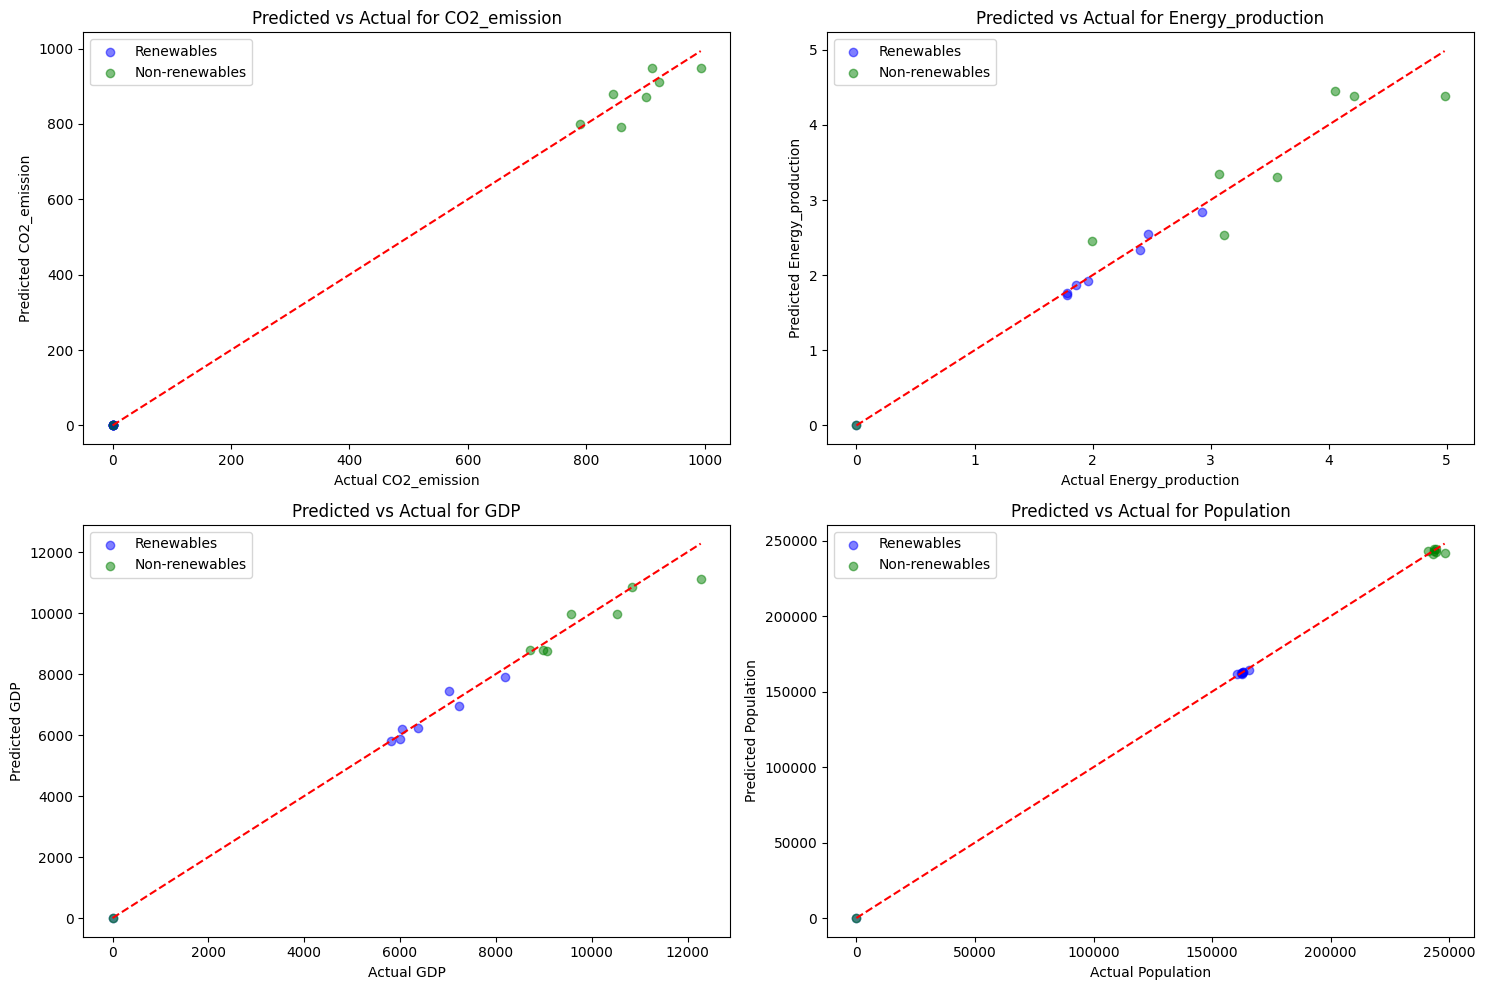

In [7]:
# Step 7: Plot the predicted vs actual values for renewables and non-renewables
plt.figure(figsize=(15,10))

for i, target in enumerate(target_columns):
    plt.subplot(2, 2, i + 1)
    
    # Plot for renewables
    plt.scatter(results['renewables']['metrics'][target]['y_test'], 
                results['renewables']['metrics'][target]['y_pred'], 
                color='blue', alpha=0.5, label='Renewables')
    
    # Plot for non-renewables
    plt.scatter(results['non-renewables']['metrics'][target]['y_test'], 
                results['non-renewables']['metrics'][target]['y_pred'], 
                color='green', alpha=0.5, label='Non-renewables')
    
    plt.plot([min(results['non-renewables']['metrics'][target]['y_test']),
              max(results['non-renewables']['metrics'][target]['y_test'])], 
             [min(results['non-renewables']['metrics'][target]['y_test']),
              max(results['non-renewables']['metrics'][target]['y_test'])], 
             color='red', linestyle='--')
    
    plt.xlabel(f'Actual {target}')
    plt.ylabel(f'Predicted {target}')
    plt.title(f'Predicted vs Actual for {target}')
    plt.legend()

plt.tight_layout()
plt.show()

# FUTURE PREDICTION

In [8]:
# Step 8: Load your existing 'country_energy.csv' file
country_energy_df = pd.read_csv('country_energy.csv')

#reload the energy data
data = pd.read_csv("energy_cleaned.csv")

# Define the country code mapping
country_code_mapping = {
    'Austria': 'AT', 'Slovakia': 'SK', 'Poland': 'PL', 'Luxembourg': 'LU', 'Finland': 'FI',
    'Czech Republic': 'CZ', 'Greece': 'GR', 'Denmark': 'DK', 'Latvia': 'LV', 'Estonia': 'EE',
    'United Kingdom': 'GB', 'Italy': 'IT', 'Ireland': 'IE', 'Portugal': 'PT', 'Germany': 'DE',
    'Belgium': 'BE', 'Switzerland': 'CH', 'Netherlands': 'NL', 'Croatia': 'HR', 'Sweden': 'SE',
    'Slovenia': 'SI', 'France': 'FR', 'Hungary': 'HU', 'Norway': 'NO', 'Lithuania': 'LT',
    'Spain': 'ES', 'Bulgaria': 'BG', 'Romania': 'RO'
}

In [9]:
# Step 9: Set the number of future years for prediction
future_years = 10  # Predict for the next 10 years

# Prepare future data for all countries
countries = list(country_code_mapping.keys())

# Initialize lists to store the future predictions
future_predictions = {
    'Country': [],
    'avg_production_renewables': [],
    'avg_production_non_renewables': [],
    'avg_CO2_emissions': [],
    'GDP': [],
    'Population': []
}

In [12]:
# Step 10: Loop over each country using 'Country'
for country in countries:
    country_data = data[data['Country'] == country]  # Use 'Country' for filtering

    # Prepare the features and targets for GDP and population prediction using 'all_energy_types'
    all_energy_data = country_data[country_data['Energy_type'] == 'all_energy_types']
    features = ['Energy_consumption']
    
    # Handle cases where 'all_energy_types' data might be missing
    if all_energy_data.empty:
        continue
    
    X_all_energy = all_energy_data[features]
    y_all_energy = all_energy_data[['GDP', 'Population']]

    rf_all_energy_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_all_energy_model.fit(X_all_energy, y_all_energy)

    future_data_gdp_pop = pd.DataFrame({'Energy_consumption': [X_all_energy['Energy_consumption'].mean()] * future_years})
    future_predictions_gdp_pop = rf_all_energy_model.predict(future_data_gdp_pop)
    future_gdp, future_population = future_predictions_gdp_pop[-1]

    # Separate predictions for renewables and non-renewables energy types
    for energy_type in ['renewables', 'non-renewables']:
        energy_data = country_data[country_data['Energy_type'] == energy_type]
        
        if energy_data.empty:
            continue

        X_energy = energy_data[features]
        y_energy = energy_data[['CO2_emission', 'Energy_production']]
        
        # Train and predict energy production and CO2 emissions
        rf_energy_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_energy_model.fit(X_energy, y_energy)

        future_data_energy = pd.DataFrame({'Energy_consumption': [X_energy['Energy_consumption'].mean()] * future_years})
        future_predictions_energy = rf_energy_model.predict(future_data_energy)
        
        avg_production = future_predictions_energy[:, 1].mean()
        avg_emissions = future_predictions_energy[:, 0].mean()
        
        # Store results for renewables or non-renewables
        if energy_type == 'renewables':
            future_predictions['avg_production_renewables'].append(avg_production)
        else:
            future_predictions['avg_production_non_renewables'].append(avg_production)
            future_predictions['avg_CO2_emissions'].append(avg_emissions)

    # Append GDP and Population (they will be the same for both energy types)
    future_predictions['Country'].append(country)
    future_predictions['GDP'].append(future_gdp)
    future_predictions['Population'].append(future_population)

In [13]:
# Step 11: Convert country names to country codes
future_predictions_df = pd.DataFrame(future_predictions)
future_predictions_df['Country_Code'] = future_predictions_df['Country'].map(country_code_mapping)
future_predictions_df.drop(columns=['Country'], inplace=True)

# Step 12: Rename the prediction columns to include 'predicted_' prefix before merging
future_predictions_df.rename(columns={
    'GDP': 'predicted_GDP',
    'Population': 'predicted_Population',
    'avg_production_renewables': 'predicted_avg_production_renewables',
    'avg_production_non_renewables': 'predicted_avg_production_non_renewables',
    'avg_CO2_emissions': 'predicted_avg_CO2_emissions'
}, inplace=True)

# Step 13: Merge with the existing country_energy.csv data on 'Country_Code'
merged_df = pd.merge(country_energy_df, future_predictions_df, on='Country_Code', how='left')

# Step 14: Round the values to 2 decimal places before saving
merged_df = merged_df.round(2)

# Save the final data to a new CSV file
output_file = 'merged_country_energy_predictions.csv'
merged_df.to_csv(output_file, index=False)

print(f"Data successfully saved to {output_file}")

Data successfully saved to merged_country_energy_predictions.csv
